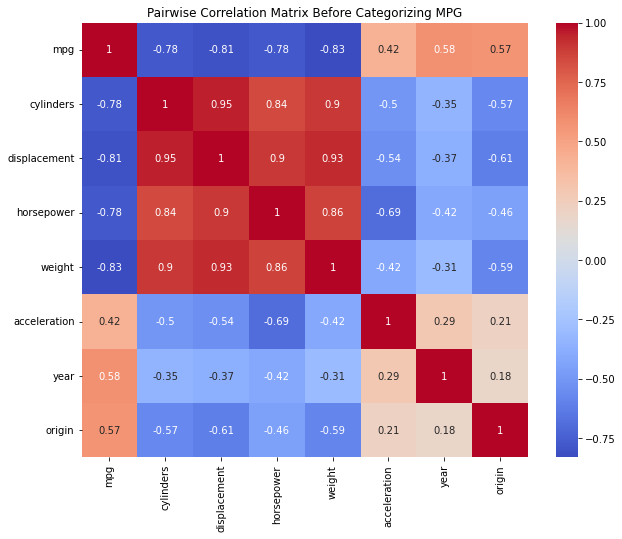

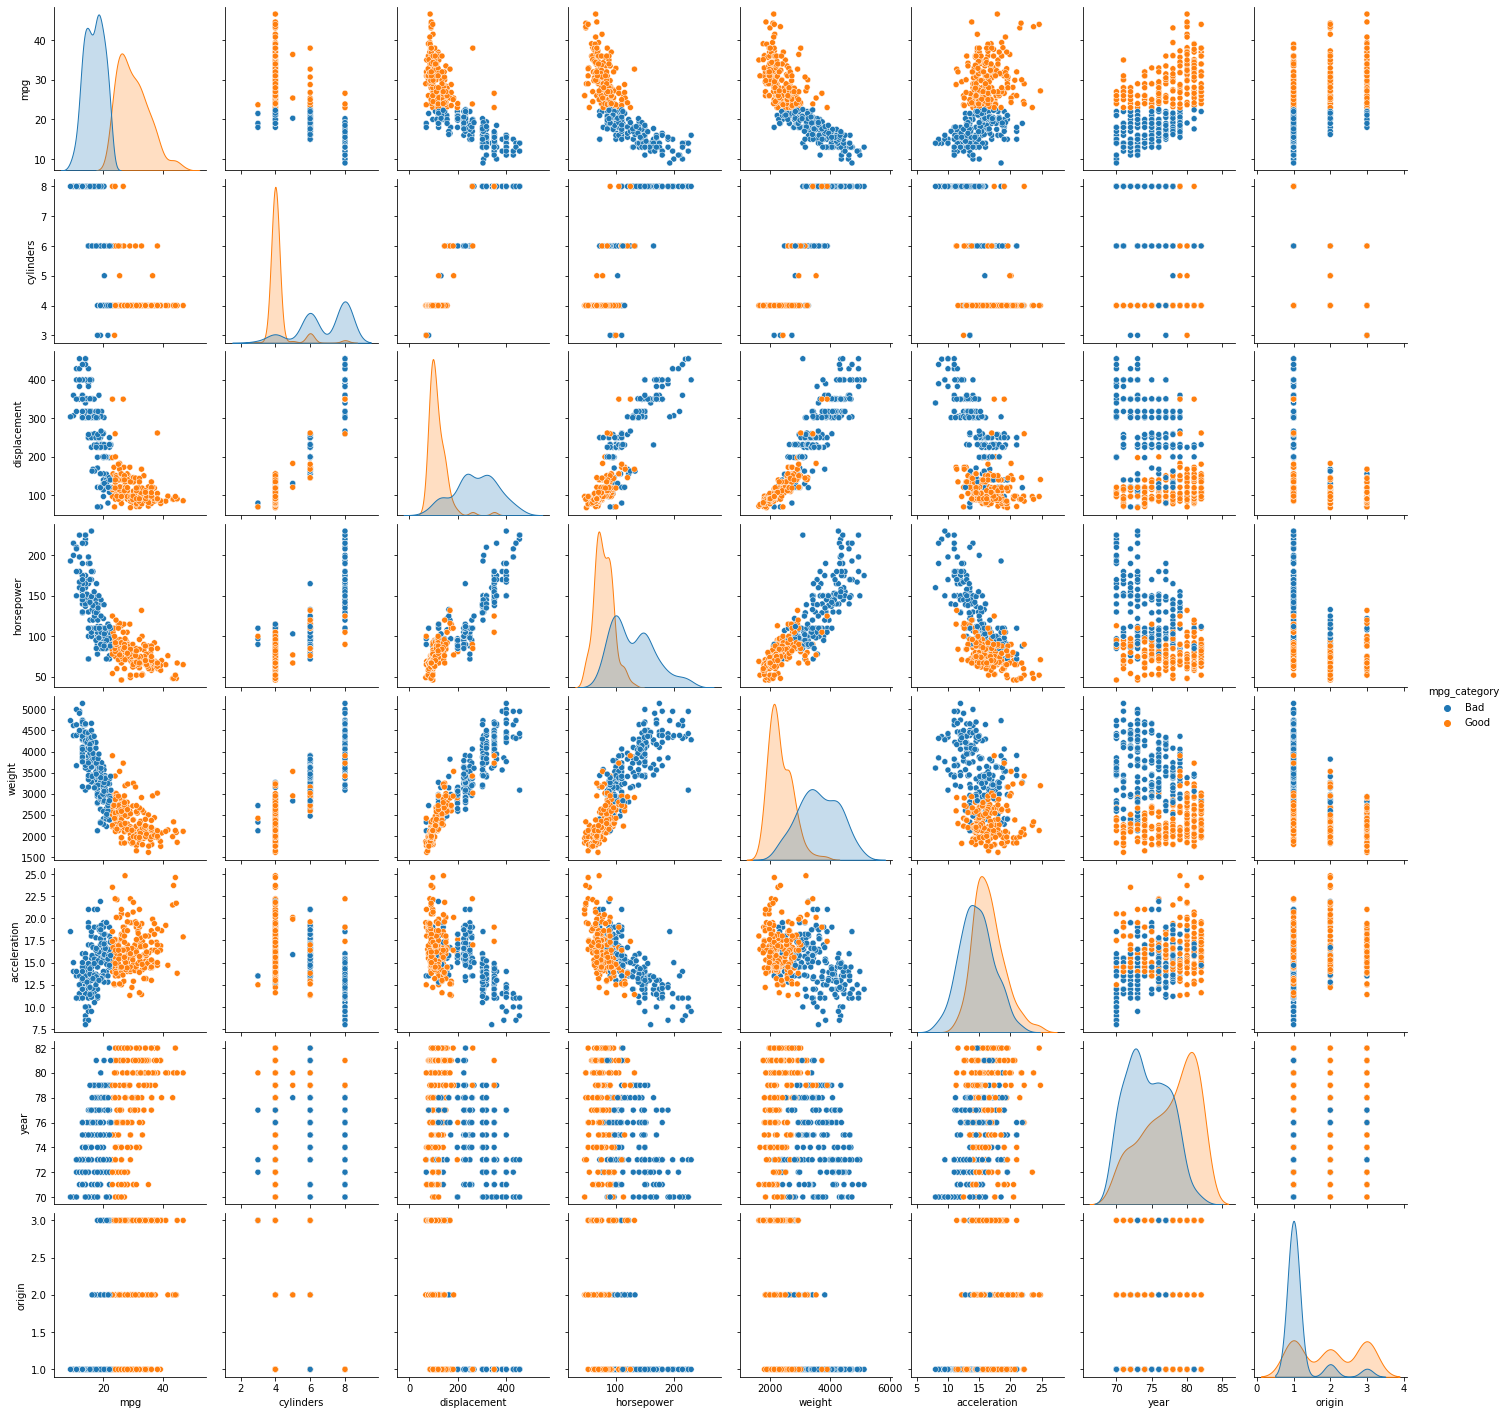

MLP Classifier Accuracy: 0.85
Logistic Regression (All Features) Accuracy: 0.85
Logistic Regression Coefficients:
   cylinders  displacement  horsepower    weight  acceleration      year  \
0  -0.369999     -0.149809   -1.400876 -2.334865     -0.021509  1.396366   

     origin  
0  0.512869  
Logistic Regression (Lasso-Selected Features) Accuracy: 0.87
Logistic Regression (Two Features) Accuracy: 0.89


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score
import numpy as np

# Read data
auto_data = pd.read_csv('Auto.csv')

# Replace '?' with NaN and drop rows with NaN values
auto_data.replace('?', np.nan, inplace=True)
auto_data.dropna(inplace=True)

# Convert columns to appropriate data types
auto_data = auto_data.astype({'mpg': float, 'cylinders': int, 'displacement': float, 
                              'horsepower': float, 'weight': float, 'acceleration': float, 
                              'year': int, 'origin': int})

### Step 1: Compute Pairwise Correlation (Before categorizing 'mpg') ###
correlation_matrix = auto_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Pairwise Correlation Matrix Before Categorizing MPG')
plt.show()

### Step 2: Categorize 'mpg' into 'Good' and 'Bad' ###
auto_data['mpg_category'] = auto_data['mpg'].apply(lambda x: 'Good' if x > auto_data['mpg'].median() else 'Bad')

# Scatter plot (pairplot) to visualize relationships between features, with categorized 'mpg'
sns.pairplot(auto_data, hue='mpg_category', diag_kind='kde')
plt.show()

# Scale data (excluding 'name', 'mpg', and 'mpg_category')
scaler = StandardScaler()
train_data, test_data = train_test_split(auto_data, test_size=0.2, random_state=42)

train_scaled = scaler.fit_transform(train_data.drop(columns=['name', 'mpg', 'mpg_category']))
test_scaled = scaler.transform(test_data.drop(columns=['name', 'mpg', 'mpg_category']))

### Step 3: Train MLP Classifier (Neural Network) ###

# Define MLPClassifier with two hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), early_stopping=True, random_state=42)

# Train MLP model
mlp.fit(train_scaled, train_data['mpg_category'])

# Predict using MLP model
mlp_pred = mlp.predict(test_scaled)

# Calculate and print accuracy of MLP model
mlp_acc = accuracy_score(test_data['mpg_category'], mlp_pred)
print(f'MLP Classifier Accuracy: {mlp_acc:.2f}')

### Step 4: Train Logistic Regression Model (All Features) ###

# Train Logistic Regression using all features
log_reg_all = LogisticRegression(max_iter=1000, random_state=42)
log_reg_all.fit(train_scaled, train_data['mpg_category'])

# Predict using Logistic Regression with all features
log_reg_all_pred = log_reg_all.predict(test_scaled)

# Calculate and print accuracy of Logistic Regression model (with all features)
log_reg_all_acc = accuracy_score(test_data['mpg_category'], log_reg_all_pred)
print(f'Logistic Regression (All Features) Accuracy: {log_reg_all_acc:.2f}')

# Display coefficients from logistic regression and compare with correlation matrix
coefficients = pd.DataFrame(log_reg_all.coef_, columns=train_data.drop(columns=['name', 'mpg', 'mpg_category']).columns)
print("Logistic Regression Coefficients:")
print(coefficients)

### Step 5: Feature Selection with Lasso and Logistic Regression ###

# Perform Lasso feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(train_scaled, train_data['mpg_category'].apply(lambda x: 1 if x == 'Good' else 0))

# Selected features from Lasso
selected_features = lasso.coef_ != 0

# Train Logistic Regression using selected features
log_reg_lasso = LogisticRegression(max_iter=1000, random_state=42)
log_reg_lasso.fit(train_scaled[:, selected_features], train_data['mpg_category'])

# Predict using Logistic Regression with selected features
log_reg_lasso_pred = log_reg_lasso.predict(test_scaled[:, selected_features])

# Calculate and print accuracy of Logistic Regression (with selected features)
log_reg_lasso_acc = accuracy_score(test_data['mpg_category'], log_reg_lasso_pred)
print(f'Logistic Regression (Lasso-Selected Features) Accuracy: {log_reg_lasso_acc:.2f}')

### Step 6: Compare Logistic Regression with Two Features ###

# Select two features ('horsepower' and 'weight')
train_two_features = train_scaled[:, [auto_data.columns.get_loc('horsepower'), 
                                      auto_data.columns.get_loc('weight')]]
test_two_features = test_scaled[:, [auto_data.columns.get_loc('horsepower'), 
                                    auto_data.columns.get_loc('weight')]]

# Train Logistic Regression using two selected features
log_reg_two = LogisticRegression(max_iter=1000, random_state=42)
log_reg_two.fit(train_two_features, train_data['mpg_category'])

# Predict using Logistic Regression with two selected features
log_reg_two_pred = log_reg_two.predict(test_two_features)

# Calculate and print accuracy of Logistic Regression (with two features)
log_reg_two_acc = accuracy_score(test_data['mpg_category'], log_reg_two_pred)
print(f'Logistic Regression (Two Features) Accuracy: {log_reg_two_acc:.2f}')